In [128]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
# Apparatus dimensions
d = 0.01

# Speed of light
c = 299792458

# Permittivity and permeability of air
epsilon_air = 1
mu_air = 1

The following analysis uses Modern ferrites: Vol. 1, Chapter 7.3.1.1, Pages 167-168

In [130]:
# A function to calculate epsilon and mu from the data
def calculate(filename):  
    # Read the data from the text file
    data = np.loadtxt(filename, skiprows=5)
 
    # Extract the frequency and S-parameter values from the data
    frequency = data[:, 0]
    s11_mag = data[:, 1]
    s11_phase = data[:, 2]
    s21_mag = data[:, 3]
    s21_phase = data[:, 4]
    s12_mag = data[:, 5]
    s12_phase = data[:, 6]
    s22_mag = data[:, 7]
    s22_phase = data[:, 8]

    # Convert to complex s-parameters (DO WE NEED 10 or 20?)
    s11 = 10 ** (s11_mag / 10) * np.exp(1j * np.deg2rad(s11_phase))
    s21 = 10 ** (s21_mag / 10) * np.exp(1j * np.deg2rad(s21_phase))
    s12 = 10 ** (s12_mag / 10) * np.exp(1j * np.deg2rad(s12_phase))
    s22 = 10 ** (s22_mag / 10) * np.exp(1j * np.deg2rad(s22_phase))

    # Calculate the reflection and transmission coefficients
    K = (s11**2-s21**2+1)/(2*s11)
    R = K+np.sqrt(K**2-1)
    T = (s11+s21-R)/(1-(s11+s21)*R)

    # Calculate the relative permittivity and permeability
    lambda_0 = c / frequency
    A = -((lambda_0/(2*np.pi*d))*np.log(1/T))**2
    B = ((1+R)/(1-R))**2
    epsilon_r = np.sqrt(A/B)
    mu_r = np.sqrt(A*B)
    
    return(frequency, epsilon_r, mu_r)

Calibration with no sample (air)

In [131]:
# Calculate baseline
frequency, baseline_epsilon, baseline_mu = calculate("NO_SAMPLE.S2P")

# Expected phase changes in air
phi_air = 360 * d * frequency / c

# Print results
print("Average relative permittivity: " , np.average(baseline_epsilon))
print("Average relative permeability: " , np.average(baseline_mu))

Average relative permittivity:  (77.93397194815925-0.05631928670711673j)
Average relative permeability:  (77.9330765204892-0.05803189258525597j)


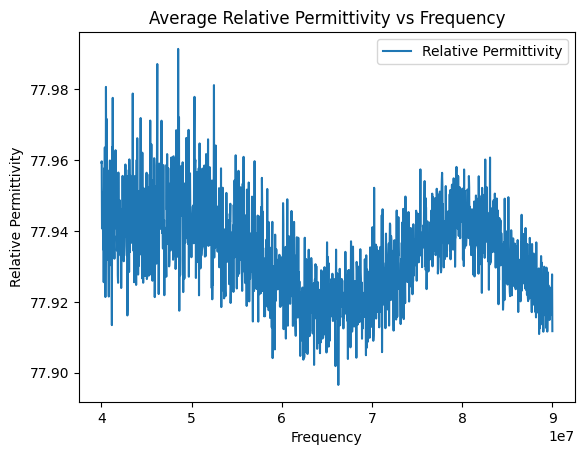

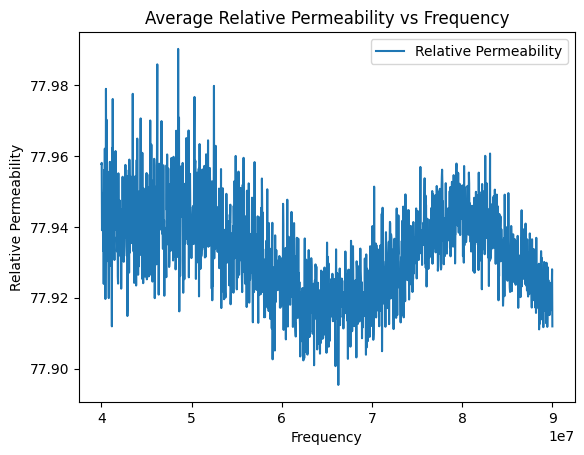

In [132]:
# Plotting the relative permittivity
plt.plot(frequency, baseline_epsilon, label='Relative Permittivity')
plt.xlabel('Frequency')
plt.ylabel('Relative Permittivity')
plt.title('Average Relative Permittivity vs Frequency')
plt.legend()
plt.show()

# Plotting the relative permeability
plt.plot(frequency, baseline_mu, label='Relative Permeability')
plt.xlabel('Frequency')
plt.ylabel('Relative Permeability')
plt.title('Average Relative Permeability vs Frequency')
plt.legend()
plt.show()

Macor Sample

In [133]:
# Calculate
frequency, macor_epsilon, macor_mu = calculate("macor_SAMPLE.S2P")

# Print results
print("Average relative permittivity: " , np.average(macor_epsilon)-np.average(baseline_epsilon))
print("Average relative permeability: " , np.average(macor_mu)-np.average(baseline_mu))

Average relative permittivity:  (2.6774209558417112-0.07553997701919796j)
Average relative permeability:  (2.4471829220505015-0.09301321187167548j)


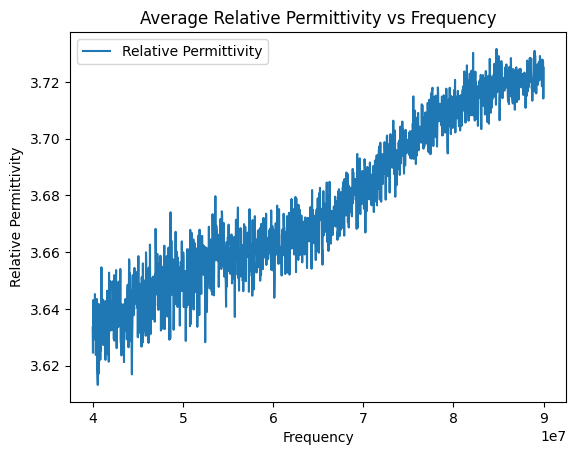

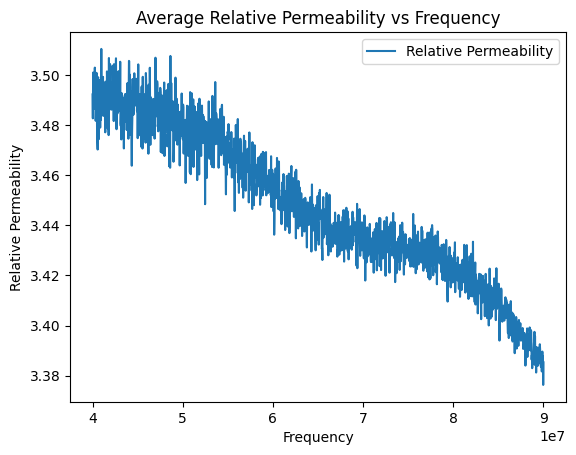

In [134]:
# Plotting the relative permittivity
plt.plot(frequency, macor_epsilon-baseline_epsilon+1, label='Relative Permittivity')
plt.xlabel('Frequency')
plt.ylabel('Relative Permittivity')
plt.title('Average Relative Permittivity vs Frequency')
plt.legend()
plt.show()

# Plotting the relative permeability
plt.plot(frequency, macor_mu-baseline_mu+1, label='Relative Permeability')
plt.xlabel('Frequency')
plt.ylabel('Relative Permeability')
plt.title('Average Relative Permeability vs Frequency')
plt.legend()
plt.show()

Ferrite Sample

In [135]:
# Calculate
frequency, ferrite_epsilon, ferrite_mu = calculate("FERRITE_SAMPLE.S2P")

# Print results
print("Average relative permittivity: " , np.average(ferrite_epsilon)-np.average(baseline_epsilon)+1)
print("Average relative permeability: " , np.average(ferrite_mu)-np.average(baseline_mu)+1)

Average relative permittivity:  (13.107660220227103-13.32811476519124j)
Average relative permeability:  (12.619877913381828-15.315323144223274j)


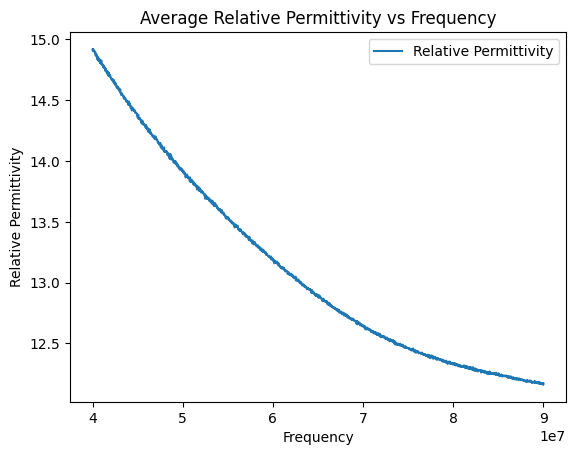

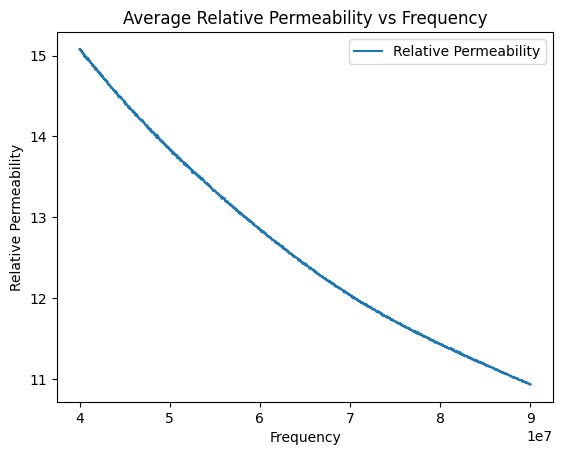

In [136]:
# Plotting the relative permittivity
plt.plot(frequency, ferrite_epsilon-baseline_epsilon+1, label='Relative Permittivity')
plt.xlabel('Frequency')
plt.ylabel('Relative Permittivity')
plt.title('Average Relative Permittivity vs Frequency')
plt.legend()
plt.show()

# Plotting the relative permeability
plt.plot(frequency, ferrite_mu-baseline_mu+1, label='Relative Permeability')
plt.xlabel('Frequency')
plt.ylabel('Relative Permeability')
plt.title('Average Relative Permeability vs Frequency')
plt.legend()
plt.show()